In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn import linear_model

C:\Users\Pc\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
data = pd.read_csv('Churn_Modelling.csv', delimiter=',')
data = data.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# One-Hot encoding 
variables = ['Geography', 'Gender']
data = pd.get_dummies(data, columns = variables, prefix = variables)

In [5]:
data.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,0,1,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,1,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,1,0,0,0,1


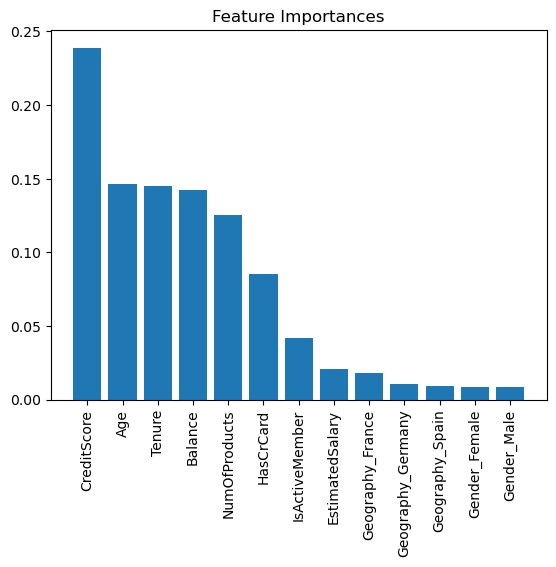

 1) CreditScore                    0.239072
 2) Age                            0.146101
 3) Tenure                         0.144845
 4) Balance                        0.142333
 5) NumOfProducts                  0.125054
 6) HasCrCard                      0.085224
 7) IsActiveMember                 0.042107
 8) EstimatedSalary                0.020549
 9) Geography_France               0.017904
10) Geography_Germany              0.010410
11) Geography_Spain                0.009040
12) Gender_Female                  0.008845
13) Gender_Male                    0.008514


In [10]:
y= data.Exited
X = data.drop(["Exited"], axis= 1)
features_labels = X.columns
RF = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
RF.fit(X,y)
features_imp = RF.feature_importances_
indices = np.argsort(features_imp)[::-1]
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), features_imp[indices], align = "center")
plt.xticks(range(X.shape[1]), features_labels, rotation = 90)
plt.show()
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_labels[i], features_imp[indices[i]]))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y)


In [17]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve

In [15]:
models = []
models.append(("KNN", KNeighborsClassifier()))
models.append(("Logistic Regression", LogisticRegression()))
models.append(("Adaboost", AdaBoostClassifier()))
models.append(("GradientBoost", GradientBoostingClassifier()))
models.append(("RandomForest", RandomForestClassifier()))

In [18]:
names = []
accuracy_results = []
test_labels = []
roc_auc_results = []
models_fit = []
for name, model in models:
    print(name)
    names.append(name)
    model_ = model.fit(X_train,y_train)
    models_fit.append(model_)
    
    accuracy = model_.score(X_test, y_test)
    accuracy_results.append(accuracy)
    
    test_ = model_.predict_proba(np.array(X_test))
    test_ = test_[:, 1]
    test_labels.append(test_)
    
    roc_auc = roc_auc_score(y_test, test_, multi_class='ovo', average='weighted')
    roc_auc_results.append(roc_auc)
    

KNN


C:\Users\Pc\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Logistic Regression


C:\Users\Pc\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Adaboost


C:\Users\Pc\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


GradientBoost


C:\Users\Pc\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


RandomForest


C:\Users\Pc\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [20]:
list_ = list(zip(names, accuracy_results, roc_auc_results))
model_results_df = pd.DataFrame(list_,
                  columns = ['Model', 'Accuracy', "ROC_AUC"])

In [21]:
model_results_df.sort_values(by = "Accuracy", ascending=False)


,Model,Accuracy,ROC_AUC
3,GradientBoost,0.8596,0.855672
4,RandomForest,0.8548,0.842210
2,Adaboost,0.8480,0.834660
1,Logistic Regression,0.7848,0.652974
0,KNN,0.7660,0.535027


In [22]:
fpr_knn, tpr_knn, _ = roc_curve(y_test, test_labels[0])
fpr_lr, tpr_lr, _ = roc_curve(y_test, test_labels[1])
fpr_ada, tpr_ada, _ = roc_curve(y_test, test_labels[2])
fpr_gb, tpr_gb, _ = roc_curve(y_test, test_labels[3])
fpr_rf, tpr_rf, _ = roc_curve(y_test, test_labels[4])

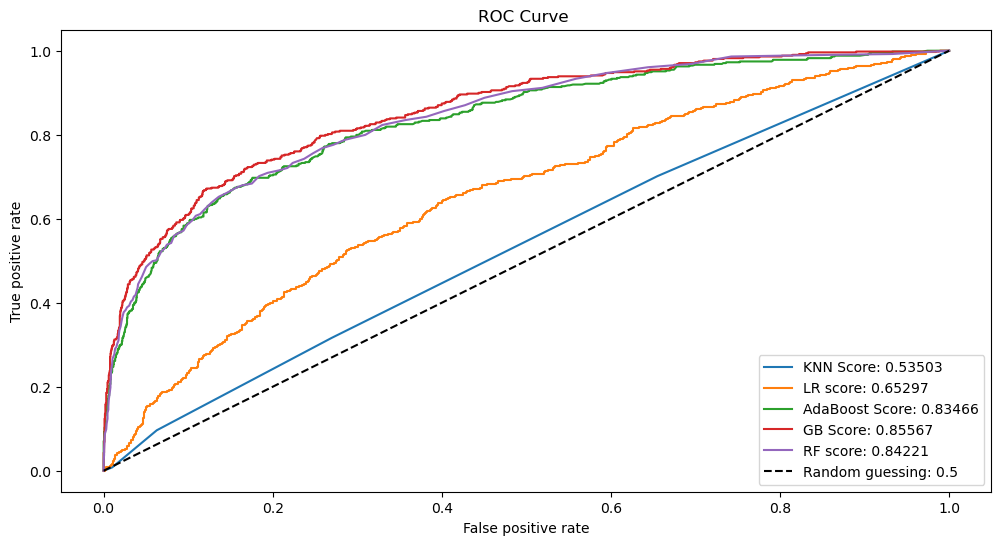

In [23]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_knn, tpr_knn, label = 'KNN Score: ' + str(round(roc_auc_results[0], 5)))
plt.plot(fpr_lr, tpr_lr, label = 'LR score: ' + str(round(roc_auc_results[1], 5)))
plt.plot(fpr_ada, tpr_ada, label = 'AdaBoost Score: ' + str(round(roc_auc_results[2], 5)))
plt.plot(fpr_gb, tpr_gb, label = 'GB Score: ' + str(round(roc_auc_results[3], 5)))
plt.plot(fpr_rf, tpr_rf, label = 'RF score: ' + str(round(roc_auc_results[4], 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve ')
plt.legend(loc='best')
plt.show()